In [1]:
import pandas as pd 
from scipy import stats as st
import matplotlib.pyplot as plt
import math as mt
import numpy as np
import warnings
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore')

## Загрузка датасета 

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [6]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


По первому обзору можно выделить, что даты не соответсвуют нужному типу. Пропусков на первый взгляд нет. Колонки я бы перевел в нижний регистр и убрал пробелы. 

In [7]:
visits['End Ts'] = visits['End Ts'].astype('datetime64')
visits['Start Ts'] = visits['Start Ts'].astype('datetime64')

In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [9]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [10]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [11]:
visits.head() #done

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [12]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [13]:
orders['Buy Ts'] = orders['Buy Ts'].astype('datetime64')

In [14]:
orders.columns = ['buy_ts', 'revenue', 'uid']

In [15]:
orders.info()#done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [16]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [17]:
costs['dt'] = costs['dt'].astype('datetime64')

In [18]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Отдельно я хочу проверить даты, вдруг там есть аномалии. 

In [19]:
visits[visits['start_ts']>visits['end_ts']].count() #как минимум две строки, где время старта наступило позже времени конца

device       2
end_ts       2
source_id    2
start_ts     2
uid          2
dtype: int64

In [20]:
visits[visits['start_ts']>visits['end_ts']]
#это что-то очень странное. 
#Можно предположить, что эти даты перепутаны местами и тогда начинает повляться смысл, но я бы просто удали строки 

,device,end_ts,source_id,start_ts,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


In [21]:
visits.drop([4181, 177972], axis=0, inplace = True)

In [22]:
visits[visits['start_ts']>visits['end_ts']]# gut 

,device,end_ts,source_id,start_ts,uid


In [23]:
orders['buy_ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [24]:
costs['dt'].describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

### Пропуски

In [25]:
visits.isna().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

In [26]:
orders.isna().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

In [27]:
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

### Дубликаты

In [28]:
visits.duplicated().sum()

0

In [29]:
orders.duplicated().sum()

0

In [30]:
costs.duplicated().sum()

0

Похоже что на этом все, вроде бы данные приведены к удобному виду. 

## Расчет метрик

Посчитайте метрики трёх видов:
* продуктовые,
* метрики электронной коммерции,
* маркетинговые.

Отобразите на графиках изменения каждой метрики во времени. Всякий раз старайтесь подобрать наиболее подходящий тип визуализации: в некоторых случаях может быть уместна тепловая карта когортного анализа.

### Продуктовые 

Рассчитайте DAU, WAU и MAU. Вычислите средние значения этих метрик за весь период;

Создадим в датасете visits столбцы с соответвующими элементами дат. 

In [31]:
visits['year'] = visits['start_ts'].dt.year
visits['month'] = visits['start_ts'].dt.month
visits['week'] = visits['start_ts'].dt.week
visits['day']=visits['start_ts'].dt.day
visits['session_date'] = visits['start_ts'].astype('datetime64[D]')
visits['session_weeks'] = visits['start_ts'].astype('datetime64[W]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')

In [32]:
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,day,session_date,session_weeks,session_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,20,2017-12-20,2017-12-14,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,19,2018-02-19,2018-02-15,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,1,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,20,2018-05-20,2018-05-17,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,27,2017-12-27,2017-12-21,2017-12-01


In [33]:
dau = visits.groupby('session_date').agg({'uid':'nunique'})

In [34]:
dau.head()

,uid
session_date,
2017-06-01,605
2017-06-02,608
2017-06-03,445
2017-06-04,476
2017-06-05,820


In [35]:
mau = visits.groupby('session_month').agg({'uid':'nunique'}).sort_values(by='session_month')

In [36]:
mau.head()

,uid
session_month,
2017-06-01,13259
2017-07-01,14183
2017-08-01,11631
2017-09-01,18975
2017-10-01,29692


In [37]:
wau = visits.groupby('session_weeks').agg({'uid':'nunique'}).sort_values('session_weeks')

In [38]:
wau.head()

,uid
session_weeks,
2017-06-01,4082
2017-06-08,3311
2017-06-15,2844
2017-06-22,3079
2017-06-29,3055


Отобразите на графиках изменения каждой метрики во времени

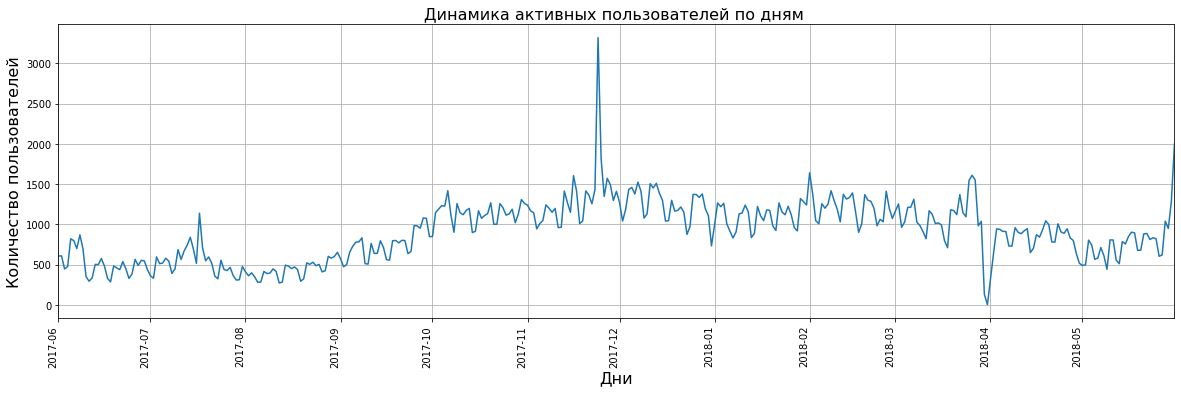

In [39]:
dau['uid'].plot(kind = 'line', figsize =(20,6), grid = True)
plt.ylabel('Количество пользователей', fontsize = 16)
plt.xlabel('Дни', fontsize = 16)
plt.title('Динамика активных пользователей по дням ', fontsize = 16)
plt.xticks(rotation=90)
plt.show()


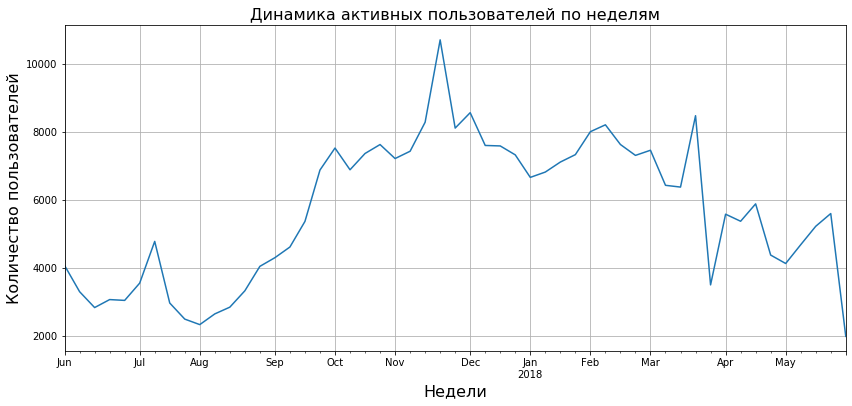

In [40]:
wau['uid'].plot(kind = 'line',figsize =(14,6), grid = True)
plt.ylabel('Количество пользователей', fontsize = 16)
plt.xlabel('Недели', fontsize = 16)
plt.title('Динамика активных пользователей по неделям', fontsize = 16)
plt.show()

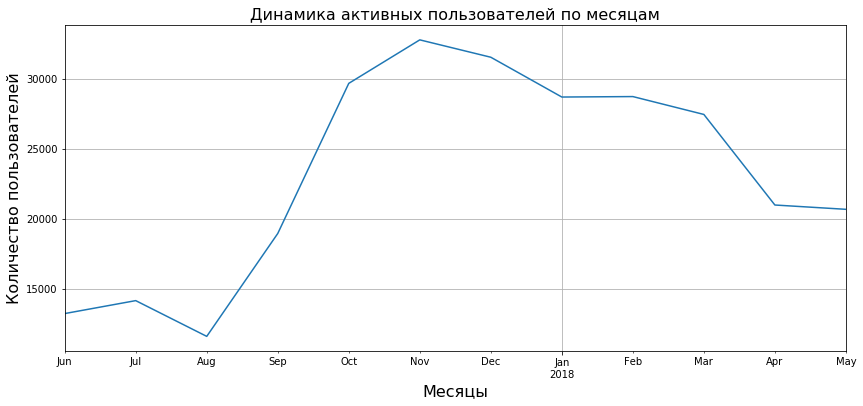

In [41]:
mau['uid'].plot(kind = 'line', figsize =(14,6), grid = True)
plt.ylabel('Количество пользователей', fontsize = 16)
plt.xlabel('Месяцы', fontsize = 16)
plt.title('Динамика активных пользователей по месяцам', fontsize = 16)
plt.show()

Графики, как видно, показывают более менее похожий тренд. В разрезе около года, как мне кажется разбивка по неделям представляется наиболее удобной для чтения. Все говорит о том, что количество активных пользователей падает

In [42]:
#fig = plt.subplots()
#dau['uid'].plot(kind = 'line', figsize =(20,6), grid = True)
#wau['uid'].plot(kind = 'line',figsize =(14,6), grid = True)
#mau['uid'].plot(kind = 'line', figsize =(14,6), grid = True)

Определите, сколько раз за день пользователи в среднем заходят на сайт

In [43]:
mean_visits_by_day = visits.groupby('session_date').agg({'uid':'count'}).reset_index()
mean_visit = mean_visits_by_day['uid'].mean()
print('Среднее количество визитов в день: {0:.2f}'.format(mean_visit))

Среднее количество визитов в день: 987.36


Исследуйте, сколько времени пользователи проводят на сайте. Узнайте продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, постройте график распределения. Изменение продолжительности сессий во времени изучать необязательно

In [44]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds #расчитаем длительность сессии в секундах 

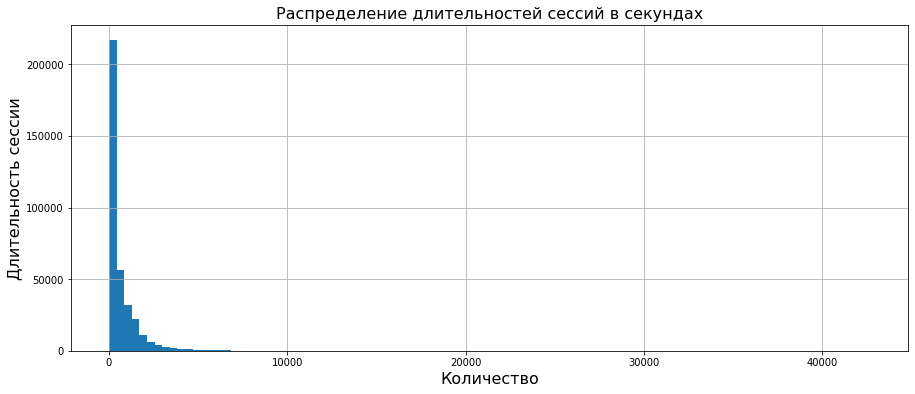

In [45]:
visits['session_duration'].hist(bins = 100, figsize = (15,6))
plt.ylabel('Длительность сессии', fontsize = 16)
plt.xlabel('Количество', fontsize = 16)
plt.title('Распределение длительностей сессий в секундах', fontsize = 16)
plt.show()
#данные распределены совсем ненормально, поэтому для расчета среднего используем моду

In [46]:
session_mean = visits['session_duration'].mode()
print('Типичная длительность сесcии составляет: {0:.2f}'.format(session_mean[0]))

Типичная длительность сесcии составляет: 60.00


Рассчитайте Retention Rate, применяя когортный анализ. Найдите средний Retention Rate на второй месяц «жизни» когорт.

In [47]:
first_visit = visits.groupby(['uid'])['start_ts'].min() #найдем дату первого визита 
first_visit.name = 'first_session'

In [48]:
visits = pd.merge(visits, first_visit, on = 'uid')

В качестве периода я предлагаю взять когорты по месяцам, так сводная таблица не будет избычточно перегруженной 

In [49]:
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,day,session_date,session_weeks,session_month,session_duration,first_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,20,2017-12-20,2017-12-14,2017-12-01,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,19,2018-02-19,2018-02-15,2018-02-01,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,1,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,20,2018-05-20,2018-05-17,2018-05-01,1440,2018-03-09 20:05:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,9,2018-03-09,2018-03-08,2018-03-01,1680,2018-03-09 20:05:00


In [50]:
visits['first_session'] = visits['first_session'].astype('datetime64[M]')

In [51]:
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,day,session_date,session_weeks,session_month,session_duration,first_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,20,2017-12-20,2017-12-14,2017-12-01,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,19,2018-02-19,2018-02-15,2018-02-01,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,1,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,20,2018-05-20,2018-05-17,2018-05-01,1440,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,9,2018-03-09,2018-03-08,2018-03-01,1680,2018-03-01


In [52]:
visits['lifetime'] = (visits['session_month'] - visits['first_session']) / np.timedelta64(1, 'M')
visits['lifetime'] = visits['lifetime'].round().astype('int')

In [53]:
visits = visits.sort_values(by='lifetime', ascending = True)

In [54]:
cohorts = visits.groupby(['first_session', 'lifetime']).agg({'uid':'nunique'}).reset_index() #расчитаем количество в каждой  когорте

In [55]:
cohorts.head(10)

,first_session,lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
5,2017-06-01,5,947
6,2017-06-01,6,809
7,2017-06-01,7,766
8,2017-06-01,8,694
9,2017-06-01,9,674


In [56]:
initial_users = cohorts[cohorts['lifetime']==0][['first_session', 'uid']]#найдем изначальное количество в когорте
initial_users = initial_users.rename(columns={'uid':'cohort_size'})
initial_users.head()


,first_session,cohort_size
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


In [57]:
cohorts = cohorts.merge(initial_users)

In [58]:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_size']

In [59]:
cohorts.head(10) #кажется все готов к сводной таблице

,first_session,lifetime,uid,cohort_size,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557
5,2017-06-01,5,947,13259,0.071423
6,2017-06-01,6,809,13259,0.061015
7,2017-06-01,7,766,13259,0.057772
8,2017-06-01,8,694,13259,0.052342
9,2017-06-01,9,674,13259,0.050833


In [60]:
output = cohorts.pivot_table(index = 'first_session', 
                             columns = 'lifetime', 
                             values = 'retention', 
                             aggfunc = 'sum').sort_values(by='first_session', ascending = True)
output.loc['mean'] = output.mean()

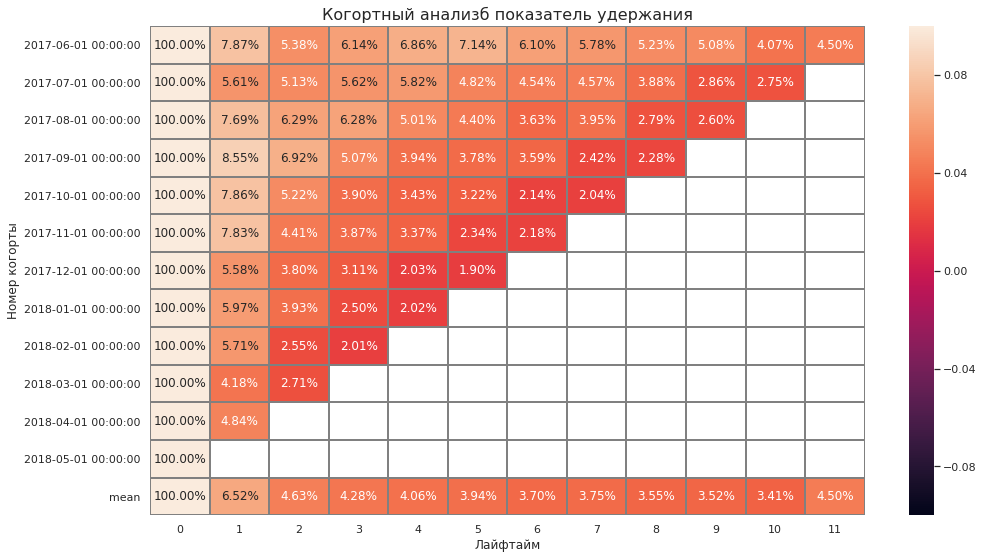

In [61]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 9))
plt.title('Когортный анализб показатель удержания', fontsize = 16)
ax = sns.heatmap(output, annot=True, fmt='.2%', linewidths=1, linecolor='gray', vmin=0, vmax=0)
#ax.set_yticklabels(output.index.date)
plt.ylabel('Номер когорты')
plt.xlabel('Лайфтайм')
plt.show()

В целом видим, что во всех когортах удержание падает. однако что что отметить - в более поздних когортах падение показателя более динамичное, чем в самой первой. Так, мартовкая когорта 2018 года упала почти в 2 раза. Первая когорта имеет самый высокий показатель удержания с течением времени. 

 Найдите средний Retention Rate на второй месяц «жизни» когорт.

In [62]:
mean_retention = cohorts[cohorts['lifetime']==1]['retention'].mean()
print('Средний retention rate на второй месяц жизни по всем когортам равен: {0:.2%}'.format(mean_retention))

Средний retention rate на второй месяц жизни по всем когортам равен: 6.52%


In [63]:
cohorts['churn_rate'] = cohorts.groupby('first_session')['uid'].pct_change()

In [64]:
churn_rate = cohorts.pivot_table(index = 'first_session', 
                                 columns = 'lifetime', 
                                 values = 'churn_rate', 
                                 aggfunc = 'sum')

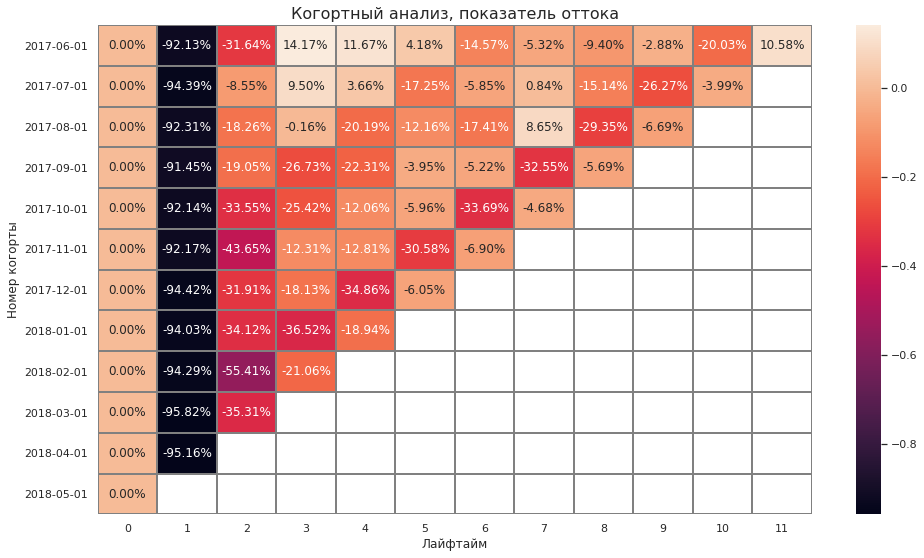

In [65]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 9))
plt.title('Когортный анализ, показатель оттока', fontsize = 16)
ax = sns.heatmap(churn_rate, annot=True, fmt='.2%', linewidths=1, linecolor='gray')
ax.set_yticklabels(churn_rate.index.date)
plt.ylabel('Номер когорты')
plt.xlabel('Лайфтайм')
plt.show()

Показатель оттока говорит о том, что люди довольо активно покидают сайт. Возмоно цель визита - некое одноразовое действие, например заказ. 

### Метрики электронной коммерции

Исследуйте, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Изучать изменение этой метрики во времени необязательно

In [66]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Найдем дату первой покупки

In [67]:
first_order = orders.groupby('uid')['buy_ts'].min().reset_index()
first_order.columns = ['uid', 'first_order']

In [68]:
first_order.head()

,uid,first_order
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [69]:
first_visit = first_visit.reset_index()
first_visit.head()

,uid,first_session
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [70]:
visit_order = first_visit.merge(first_order, on ='uid', how = 'inner')

In [71]:
visit_order.head()

,uid,first_session,first_order
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [72]:
visit_order[visit_order['first_order']<visit_order['first_session']] 
# у нас нет строк, где заказ был бы раньше первого посещения

,uid,first_session,first_order


In [73]:
visit_order['first_conversion'] = ((visit_order['first_order'] - visit_order['first_session']).dt.seconds)/60

In [74]:
visit_order['first_conversion'].head()

0    1382.0
1       0.0
2      79.0
3    1184.0
4       0.0
Name: first_conversion, dtype: float64

Есть предположение, что заказы с 0 секунд это заказы осуществленные через сторонние интерфейсы. В итоге они считывают время покупки как первое время посещения. Чтож, такая теория звучит правдоподобно.

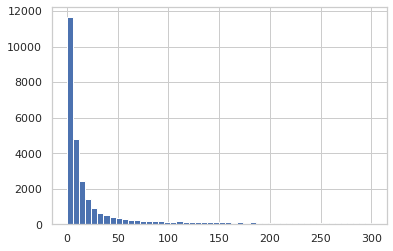

In [75]:
visit_order['first_conversion'].hist(bins=50, range=(0,300)) #распределение ненормальное 

In [76]:
first_conversion = visit_order['first_conversion'].mode()
print('Среднее время заказа после посещения составляет: {0:.2f} минут'.format(first_conversion[0]))

Среднее время заказа после посещения составляет: 1.00 минут


 Применяя когортный анализ или другой метод, рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно

У нас уже есть время первой покупки, предлагаю найти лайфтайм покупок

In [77]:
orders = orders.merge(first_order, on = 'uid')

In [78]:
orders.head()

,buy_ts,revenue,uid,first_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


In [79]:
orders['lifetime'] = (orders['buy_ts'] - orders['first_order'])/np.timedelta64(1, 'M')
orders['lifetime'] = orders['lifetime'].round().astype('int')

In [80]:
orders['lifetime'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [81]:
orders_cohorts = orders.query('lifetime<7') #сделаем срез по первым 6 месяцам

In [82]:
orders_cohorts['first_order'] = orders_cohorts['first_order'].astype('datetime64[M]')

In [83]:
result = orders_cohorts.groupby(['first_order','lifetime']).agg({'uid':['count','nunique']}).reset_index()

In [84]:
result.columns = ['first_order', 'lifetime','n_orders', 'n_users']

In [85]:
result.head() #теперь расчитаем количество заказаов на 1 человека в когорте

,first_order,lifetime,n_orders,n_users
0,2017-06-01,0,2355,2023
1,2017-06-01,1,147,58
2,2017-06-01,2,152,48
3,2017-06-01,3,236,57
4,2017-06-01,4,278,82


In [86]:
result['order_per_person'] = result['n_orders'] / result['n_users']

In [87]:
result_pivot = result.pivot_table(index='first_order', columns = 'lifetime', values = 'order_per_person', aggfunc = 'mean')
result_pivot.fillna('')

lifetime,0,1,2,3,4,5,6
first_order,,,,,,,
2017-06-01,1.164113,2.53448,3.16667,4.14035,3.39024,3.34426,4.38095
2017-07-01,1.138846,1.87755,1.91525,1.81034,1.44,1.86111,1.76744
2017-08-01,1.140146,2.17778,2.04167,1.83333,2,1.875,1.6
2017-09-01,1.147230,1.60656,1.75269,2.3125,1.37931,1.64706,1.48438
2017-10-01,1.147926,1.53073,1.38931,1.29,1.38889,1.38235,1.46667
2017-11-01,1.213183,1.78621,1.62963,1.875,1.6125,1.30612,1.35088
2017-12-01,1.154917,1.90551,1.89381,2.05682,1.5283,1.75,1.45455
2018-01-01,1.128669,2.08911,1.8625,1.47059,1.59459,2.33333,
2018-02-01,1.123528,2.05556,1.40678,1.78125,1.2,,


Довольно хорошие показатели, количество заказов в среднем на человека во всех когортах в целом растет с течением времени. Есть местами просадки к 6 месяцу, но в целом все еще выше чем в 0 месяц. Однако, как мне кажется такие показатели вызваны тем, что у нас довольно высокий отток, поэтому данные цифры весьма относительны.  

Рассчитайте средний чек

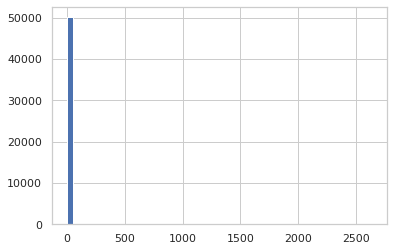

In [88]:
orders['revenue'].hist(bins = 50) #нормального распределения нет

In [89]:
mean_receipt = orders_cohorts['revenue'].mode()
print('Средний чек по всем заказам: {0:.2f} y.e.'.format(mean_receipt[0]))

Средний чек по всем заказам: 1.83 y.e.


In [90]:
mean_cohort =  orders_cohorts.groupby(['first_order','lifetime']).agg({'revenue':'sum'}).reset_index()

In [91]:
mean_cohort.head()

,first_order,lifetime,revenue
0,2017-06-01,0,9620.09
1,2017-06-01,1,783.90
2,2017-06-01,2,771.15
3,2017-06-01,3,1736.89
4,2017-06-01,4,2213.74


In [92]:
mean_pivot = mean_cohort.pivot_table(index='first_order', columns = 'lifetime', values = 'revenue', aggfunc = 'mean')
mean_pivot.fillna('') #а вот так выглядит средний чек по когортам за 6 месяцев 

lifetime,0,1,2,3,4,5,6
first_order,,,,,,,
2017-06-01,9620.09,783.9,771.15,1736.89,2213.74,1447.43,1811.8
2017-07-01,11592.26,621.68,1141.5,696.43,354.15,232.71,246.15
2017-08-01,7293.90,734.09,586.15,712.44,453.14,385.58,426.41
2017-09-01,14851.00,2521.13,2530.82,9100.75,1565.95,1877.14,842.19
2017-10-01,21949.96,2009.38,976.71,630.53,727.25,421.54,341.22
2017-11-01,21365.92,1302.83,1085.35,1028.91,623.72,255.08,327.61
2017-12-01,20696.13,1153.01,4040.45,4728.26,1347.79,1463.79,56.31
2018-01-01,13999.07,1056.96,1058.97,355.57,174.96,17.6,
2018-02-01,15160.96,1061.56,272.04,234,21.94,,


Выясните, как меняется во времени LTV на покупателя по когортам. Помните, что LTV — накопительная метрика. Рассчитайте средний LTV по когортам за 6 месяцев; в расчёт включайте когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%.

In [93]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['first_order'] = orders['first_order'].astype('datetime64[M]')

In [94]:
orders.head()

,buy_ts,revenue,uid,first_order,lifetime,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,0,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,0,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,0,2017-06-01


вычислим размеры когорт

In [95]:
cohort_sizes = orders.groupby(['first_order','lifetime']).agg({'uid':'nunique'}).reset_index()

In [96]:
cohort_sizes.head()

,first_order,lifetime,uid
0,2017-06-01,0,2023
1,2017-06-01,1,58
2,2017-06-01,2,48
3,2017-06-01,3,57
4,2017-06-01,4,82


In [97]:
cohort_sizes = cohort_sizes[cohort_sizes['lifetime']==0][['first_order','uid']]
cohort_sizes.columns = ['first_order', 'n_buyers']

In [98]:
cohort_sizes.head()

,first_order,n_buyers
0,2017-06-01,2023
13,2017-07-01,1923
25,2017-08-01,1370
35,2017-09-01,2581
45,2017-10-01,4340


In [99]:
cohorts = orders.groupby(['first_order','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [100]:
report = pd.merge(cohort_sizes, cohorts, on='first_order')

In [101]:
report['age'] = (report['order_month'] - report['first_order']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [102]:
report['ltv'] = report['revenue'] / report['n_buyers']
report.head()

,first_order,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [103]:
#report = report.query('age>6') #нам нужны когорты, которые прожили от 6 месяцев 

In [104]:
report_pivot = report.pivot_table(index='first_order',columns = 'age', values='ltv', aggfunc = 'mean')
report_pivot = report_pivot.cumsum(axis=1)

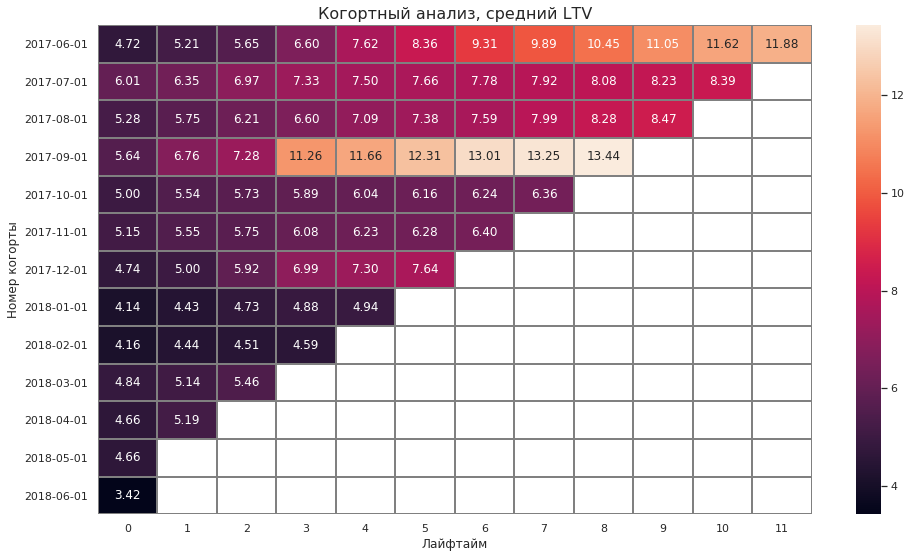

In [105]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 9))
plt.title('Когортный анализ, средний LTV', fontsize = 16)
ax = sns.heatmap(report_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
ax.set_yticklabels(report_pivot.index.date)
plt.ylabel('Номер когорты')
plt.xlabel('Лайфтайм')
plt.show()

Динамика роста довольно неплохая. Сентябрьская когорта 2017 года пока является самой доходной, имея к 8 месяцу жизни наибольший показатель ценности. 

### Маркетинговые метрики

Посчитайте и отобразите на графиках, как маркетинговые метрики различаются по рекламным источникам.

Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому важно определить «главный» источник для 
каждого и учитывать это в расчётах. Например, главным может стать первый источник перехода.

Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам

In [106]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [107]:
total_cost = costs[['source_id','dt','costs']] #продублирую датафрейм чтобы ничего не сломалось в коде ниже
total_cost

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [108]:
total_cost['cost_month'] = total_cost['dt'].astype('datetime64[M]')

In [109]:
cost_month_source = total_cost.groupby(['source_id','cost_month']).agg({'costs':'sum'}).reset_index()
cost_month_source.head()

,source_id,cost_month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75


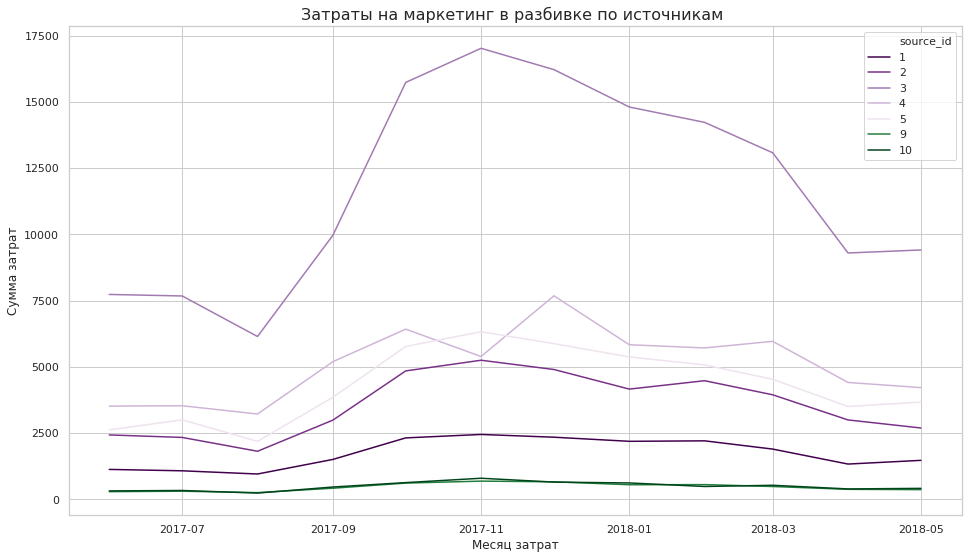

In [110]:
plt.figure(figsize = (16, 9))
plt.title('Затраты на маркетинг в разбивке по источникам ', fontsize = 16)
sns.lineplot(data=cost_month_source, x='cost_month',y='costs', hue='source_id',legend='full',palette='PRGn')
plt.ylabel('Сумма затрат')
plt.xlabel('Месяц затрат')
plt.show()

Как видим, по 3 источнику затраты стали выходить из под контроля примерно в августе 2017, но со временем стали снижаться. 

In [111]:
costs_by_source = costs.groupby(['source_id','dt']).agg({'costs':'sum'}).reset_index()
costs_by_source.head() #затраты на рекламу по источникам и дням.

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Рассчитайте средний CAC на одного покупателя для всего проекта и для каждого источника трафика

In [112]:
total_users = orders['uid'].nunique()
total_users

36523

In [113]:
cost_total = costs['costs'].sum()

In [114]:
mean_cac = cost_total / total_users
print('Средний CAC для всего проекта : {0:.2f}'.format(mean_cac))

Средний CAC для всего проекта : 9.01


Теперь для каждого источника трафика. Для начала надо бы расчитать уникальных пользователей по каждому источнику. В качетсве главного возмем источник, с которого пользователь пришел впервые.

In [115]:
visits.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,day,session_date,session_weeks,session_month,session_duration,first_session,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,20,2017-12-20,2017-12-14,2017-12-01,1080,2017-12-01,0
238551,desktop,2017-09-05 16:30:00,3,2017-09-05 16:29:00,227082950113480631,2017,9,36,5,2017-09-05,2017-08-31,2017-09-01,60,2017-09-01,0
238550,desktop,2017-09-30 13:03:00,4,2017-09-30 13:00:00,13760736556833858699,2017,9,39,30,2017-09-30,2017-09-28,2017-09-01,180,2017-09-01,0
238549,desktop,2018-01-04 12:42:00,3,2018-01-04 12:13:00,12498292581781285854,2018,1,1,4,2018-01-04,2018-01-04,2018-01-01,1740,2018-01-01,0
238548,desktop,2017-06-15 14:32:00,2,2017-06-15 14:23:00,50416866237744178,2017,6,24,15,2017-06-15,2017-06-15,2017-06-01,540,2017-06-01,0


In [116]:
#first_visit_source = visits.groupby('uid').min()[['source_id']]

In [117]:
visits_main_source = visits.sort_values('start_ts').groupby('uid').first()

In [118]:
visits_main_source = visits_main_source[['source_id']].reset_index()

In [119]:
visits_main_source.head()

,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [120]:
orders_new = orders.merge(visits_main_source, on = 'uid')

In [121]:
orders_new['order_day'] = orders_new['buy_ts'].astype('datetime64[D]')

In [122]:
first_order_day = orders_new.groupby('uid')[['buy_ts']].min().reset_index()

In [123]:
first_order_day['buy_ts'] = first_order_day['buy_ts'].astype('datetime64[D]')
first_order_day.columns = ['uid','first_order_day']

In [124]:
first_order_day

,uid,first_order_day
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24
...,...,...
36518,18445147675727495770,2017-11-24
36519,18445407535914413204,2017-09-22
36520,18445601152732270159,2018-03-26
36521,18446156210226471712,2018-02-18


In [125]:
orders_new = orders_new.merge(first_order_day, on = 'uid')

In [126]:
orders_new.head()

,buy_ts,revenue,uid,first_order,lifetime,order_month,source_id,order_day,first_order_day
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,0,2017-06-01,1,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,0,2017-06-01,2,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,0,2017-06-01,2,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,0,2017-06-01,2,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,0,2017-06-01,3,2017-06-01,2017-06-01


In [127]:
#orders_new['first_order_day'] = orders_new['buy_ts'].astype('datetime64[D]')

In [128]:
users = orders_new.groupby(['source_id', 'first_order_day']).agg({'uid':'nunique'}).reset_index() 
#количество уникальных юзеров по источнику

In [129]:
users.head()

,source_id,first_order_day,uid
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18


In [130]:
costs_by_source.head() #затраты по источнику и дню

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [131]:
costs_by_source.columns = ['source_id','first_order_day','costs']

In [132]:
cac = users.merge(costs_by_source, on = ['source_id','first_order_day'])

In [133]:
cac.head()

,source_id,first_order_day,uid,costs
0,1,2017-06-01,14,75.20
1,1,2017-06-02,7,62.25
2,1,2017-06-03,7,36.53
3,1,2017-06-04,3,55.00
4,1,2017-06-05,18,57.08


In [134]:
cac.columns = ['source_id', 'date','uid','costs']

In [135]:
cac.head()

,source_id,date,uid,costs
0,1,2017-06-01,14,75.20
1,1,2017-06-02,7,62.25
2,1,2017-06-03,7,36.53
3,1,2017-06-04,3,55.00
4,1,2017-06-05,18,57.08


In [136]:
cac['cac'] = cac['costs'] / cac['uid']

In [137]:
cac['month'] = cac['date'].astype('datetime64[M]')

In [138]:
cac.head()

,source_id,date,uid,costs,cac,month
0,1,2017-06-01,14,75.20,5.371429,2017-06-01
1,1,2017-06-02,7,62.25,8.892857,2017-06-01
2,1,2017-06-03,7,36.53,5.218571,2017-06-01
3,1,2017-06-04,3,55.00,18.333333,2017-06-01
4,1,2017-06-05,18,57.08,3.171111,2017-06-01


In [139]:
#cac_month.groupby('month')['cac']

In [140]:
cac_mean = cac.groupby('source_id').agg({'cac':'mean'}).reset_index()

In [141]:
cac_mean #средний САС по источникам

,source_id,cac
0,1,9.489732
1,2,16.287024
2,3,15.580474
3,4,7.271743
4,5,8.336731
5,9,6.842532
6,10,6.555415


In [142]:
cac_pivot = cac.pivot_table(index = 'month',columns = 'source_id', values = 'cac', aggfunc = 'mean')

Text(0.5, 1.0, 'Динамика среднего САС в разбивке по источникам')

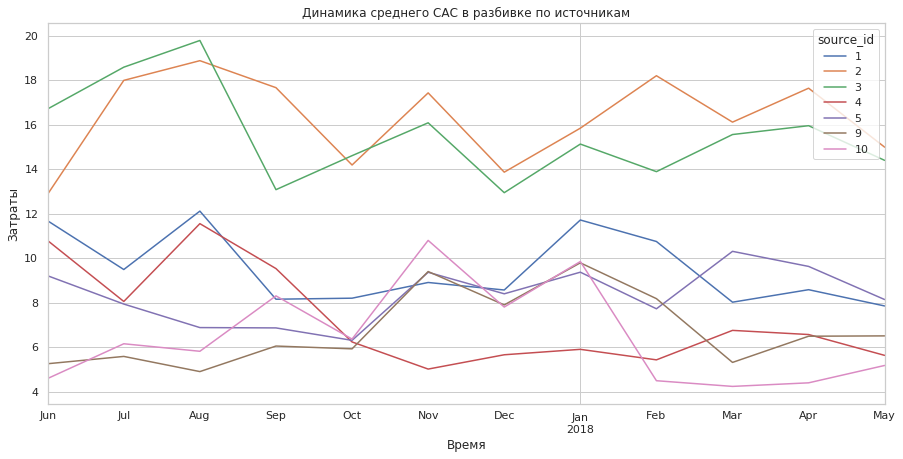

In [143]:
cac_pivot.plot(figsize=(15,7))
plt.ylabel('Затраты')
plt.xlabel('Время')
plt.title('Динамика среднего САС в разбивке по источникам')

По всем источникам затраты со временем падают, хотя вот по 10 есть рост, а потом падение.

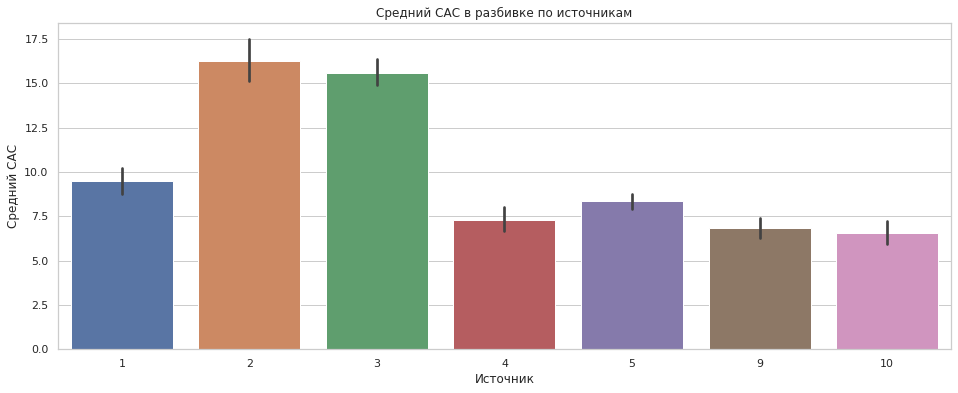

In [144]:
plt.figure(figsize = (16, 6)) #средний сас по источникам
ax = sns.barplot(x="source_id", y="cac", data=cac)
plt.xlabel('Источник')
plt.ylabel('Средний САС')
plt.title('Cредний САС в разбивке по источникам')
plt.show()

Средний САС по 2 источнику самый высокий, около 16 y.e. Третий идет сразу за ним. Пока неясно насколько такие затраты разумны. 

Рассчитайте ROMI по когортам в разрезе источников. Сравните окупаемость за одинаковые периоды жизни когорт. Обратите внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV.

In [145]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [146]:
orders_new.head()

,buy_ts,revenue,uid,first_order,lifetime,order_month,source_id,order_day,first_order_day
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,0,2017-06-01,1,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,0,2017-06-01,2,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,0,2017-06-01,2,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,0,2017-06-01,2,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,0,2017-06-01,3,2017-06-01,2017-06-01


In [147]:
report.head()

,first_order,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


Для начала стоит сделать когортный LTV c разбивкой на источники. Воспользуемся таблицей orders_new, в которой уже определен главный источник

Вычислим размеры когорт в разбивке по источникам

In [148]:
cohort_sizes = orders_new.groupby(['source_id','first_order','lifetime']).agg({'uid':'nunique'}).reset_index()
#cohort_sizes.columns = ['first_order', 'source_id','n_buyers']

In [149]:
cohort_sizes.head()

,source_id,first_order,lifetime,uid
0,1,2017-06-01,0,190
1,1,2017-06-01,1,15
2,1,2017-06-01,2,11
3,1,2017-06-01,3,10
4,1,2017-06-01,4,12


In [150]:
initial_cohort = cohort_sizes[cohort_sizes['lifetime']==0][['first_order','source_id','uid']]

In [151]:
initial_cohort.columns = ['first_order', 'source_id','n_buyers']
initial_cohort.head()

,first_order,source_id,n_buyers
0,2017-06-01,1,190
13,2017-07-01,1,160
25,2017-08-01,1,113
35,2017-09-01,1,227
45,2017-10-01,1,340


In [152]:
orders_new.head()

,buy_ts,revenue,uid,first_order,lifetime,order_month,source_id,order_day,first_order_day
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,0,2017-06-01,1,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,0,2017-06-01,2,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,0,2017-06-01,2,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,0,2017-06-01,2,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,0,2017-06-01,3,2017-06-01,2017-06-01


In [153]:
revenue = orders_new.groupby(['source_id','first_order','order_month']).agg({'revenue':'sum'}).reset_index()
revenue. head() #выручка по когортам в разбивке на источники

,source_id,first_order,order_month,revenue
0,1,2017-06-01,2017-06-01,1378.70
1,1,2017-06-01,2017-07-01,414.98
2,1,2017-06-01,2017-08-01,419.43
3,1,2017-06-01,2017-09-01,714.24
4,1,2017-06-01,2017-10-01,811.20


In [154]:
report_new = revenue.merge(initial_cohort, on =['source_id','first_order'])

In [155]:
report_new.head()

,source_id,first_order,order_month,revenue,n_buyers
0,1,2017-06-01,2017-06-01,1378.70,190
1,1,2017-06-01,2017-07-01,414.98,190
2,1,2017-06-01,2017-08-01,419.43,190
3,1,2017-06-01,2017-09-01,714.24,190
4,1,2017-06-01,2017-10-01,811.20,190


In [156]:
report_new['ltv'] = report_new['revenue'] / report_new['n_buyers']

In [157]:
#costs['month'] = costs['dt'].astype('datetime64[M]')

In [158]:
#costs_1 = costs.groupby(['source_id','month']).agg({'costs':'sum'}).reset_index()
#costs_1.columns = ['source_id','order_month','costs']

In [159]:
#costs_1.head()

In [160]:
cac_mean.columns = ['source_id','mean_cac']
cac_mean

,source_id,mean_cac
0,1,9.489732
1,2,16.287024
2,3,15.580474
3,4,7.271743
4,5,8.336731
5,9,6.842532
6,10,6.555415


In [161]:
monthly_costs = total_cost.groupby(['source_id','cost_month']).agg({'costs':'sum'}).reset_index()
monthly_costs.head()

,source_id,cost_month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75


Испортируем средний САС по источникам в таблицу

In [162]:
report_new = pd.merge(report_new, monthly_costs, left_on=['source_id','first_order'], right_on = ['source_id','cost_month'])

In [163]:
report_new.head()

,source_id,first_order,order_month,revenue,n_buyers,ltv,cost_month,costs
0,1,2017-06-01,2017-06-01,1378.70,190,7.256316,2017-06-01,1125.61
1,1,2017-06-01,2017-07-01,414.98,190,2.184105,2017-06-01,1125.61
2,1,2017-06-01,2017-08-01,419.43,190,2.207526,2017-06-01,1125.61
3,1,2017-06-01,2017-09-01,714.24,190,3.759158,2017-06-01,1125.61
4,1,2017-06-01,2017-10-01,811.20,190,4.269474,2017-06-01,1125.61


In [164]:
report_new['cac'] = report_new['costs'] / report_new['n_buyers']

In [165]:
report_new['romi'] = report_new['ltv'] / report_new['cac']

In [166]:
report_new['age'] = (report_new['order_month'] - report_new['first_order'])/np.timedelta64(1, 'M')
report_new['age'] = report_new['age'].round().astype('int')

In [167]:
report_new.head() #сколько же я времени убил на эту таблицу. 

,source_id,first_order,order_month,revenue,n_buyers,ltv,cost_month,costs,cac,romi,age
0,1,2017-06-01,2017-06-01,1378.70,190,7.256316,2017-06-01,1125.61,5.924263,1.224847,0
1,1,2017-06-01,2017-07-01,414.98,190,2.184105,2017-06-01,1125.61,5.924263,0.368671,1
2,1,2017-06-01,2017-08-01,419.43,190,2.207526,2017-06-01,1125.61,5.924263,0.372625,2
3,1,2017-06-01,2017-09-01,714.24,190,3.759158,2017-06-01,1125.61,5.924263,0.634536,3
4,1,2017-06-01,2017-10-01,811.20,190,4.269474,2017-06-01,1125.61,5.924263,0.720676,4


In [168]:
#report_new[report_new['source_id']==10]['romi'].describe()

In [169]:
def romi(source): #функция для расчета сводной таблицы по определенном источнику
    romi = report_new.query('source_id==@source')
    romi_pivot = romi.pivot_table(index='first_order', columns = 'age', values='romi', aggfunc = 'mean').cumsum(axis=1).round(2) 
    
    sns.set(style = 'whitegrid')
    plt.figure(figsize = (16, 9))
    plt.title('Когортный анализ Romi по источнику {0:.0f}'.format(source), fontsize = 16)
    ax = sns.heatmap(romi_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
    ax.set_yticklabels(romi_pivot.index.date)
    plt.ylabel('Номер когорты')
    plt.xlabel('Лайфтайм')
    plt.show()
    

In [170]:
sources = report_new.source_id.unique().tolist() #выпишем все источники в список

In [171]:
#romi(2)

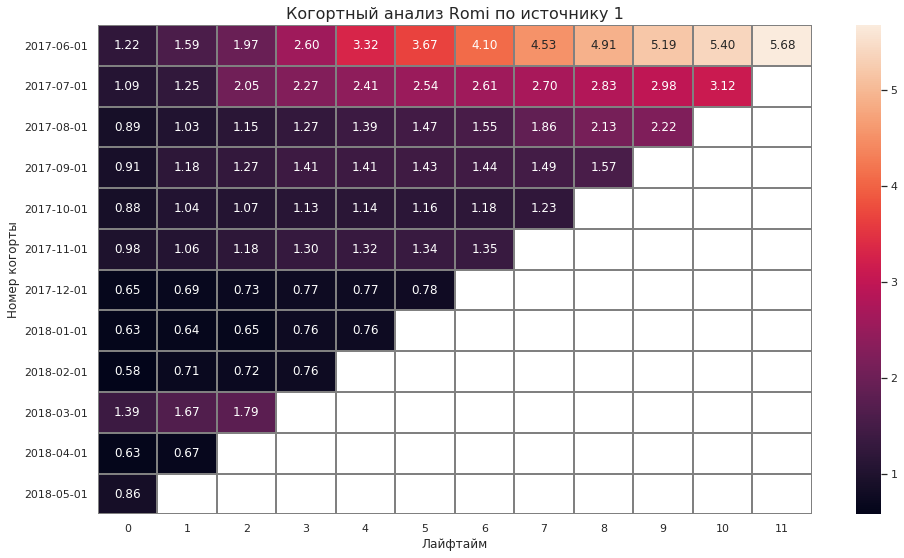

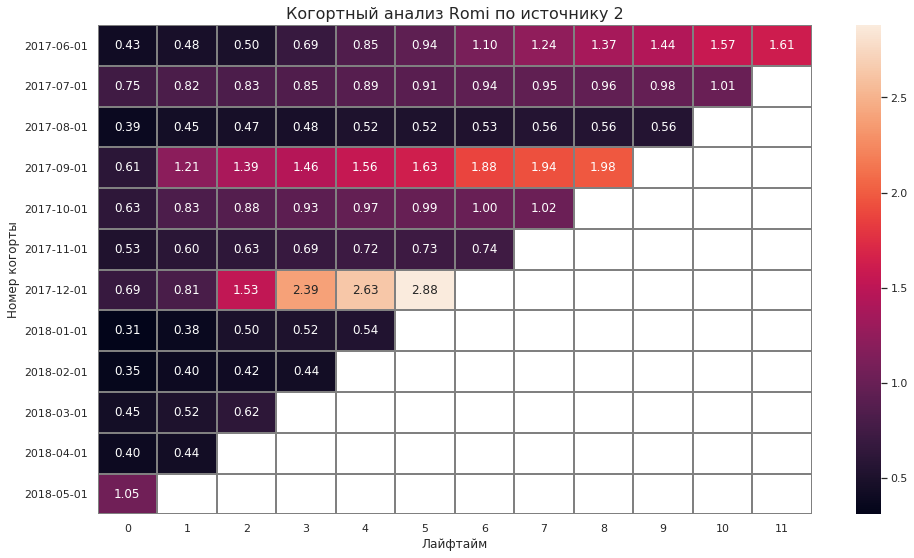

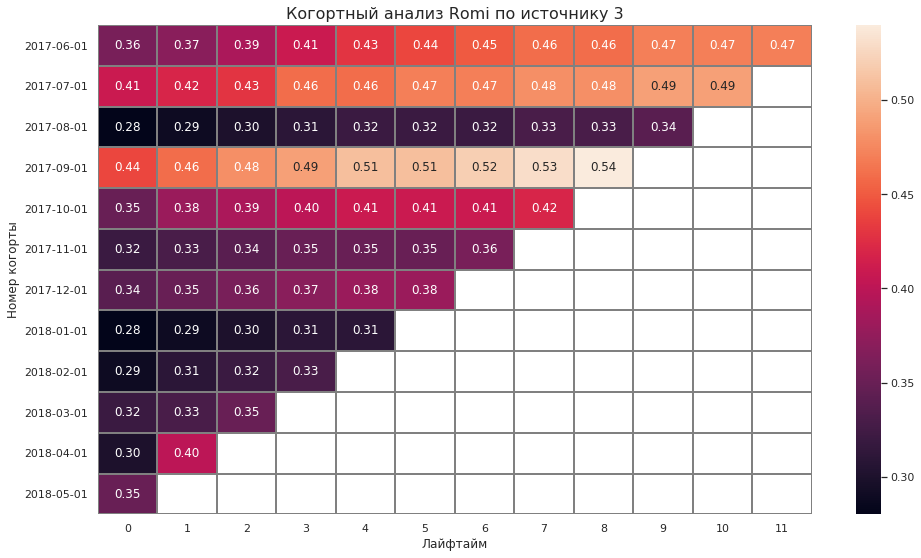

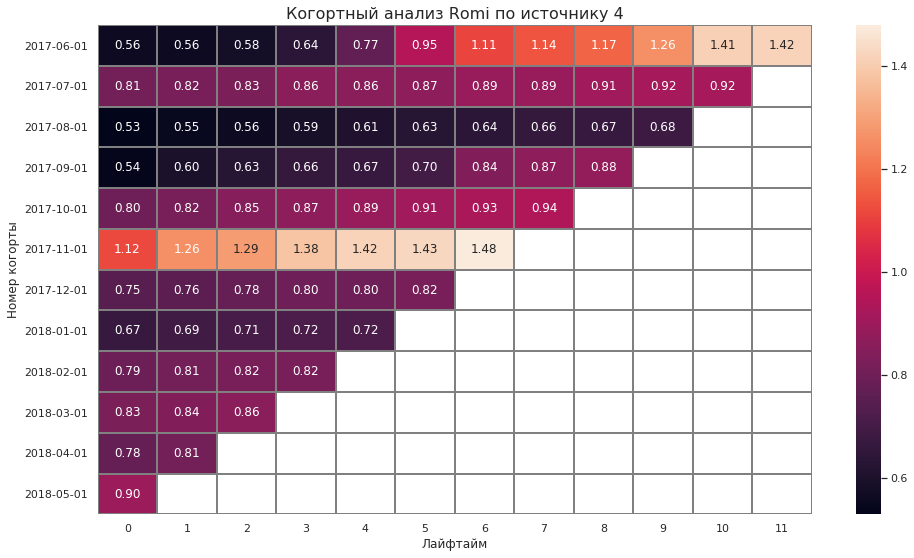

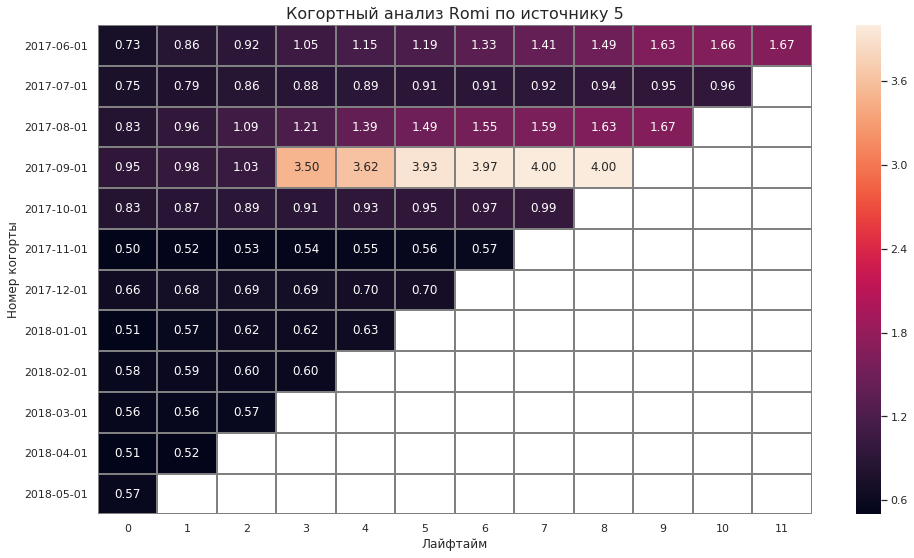

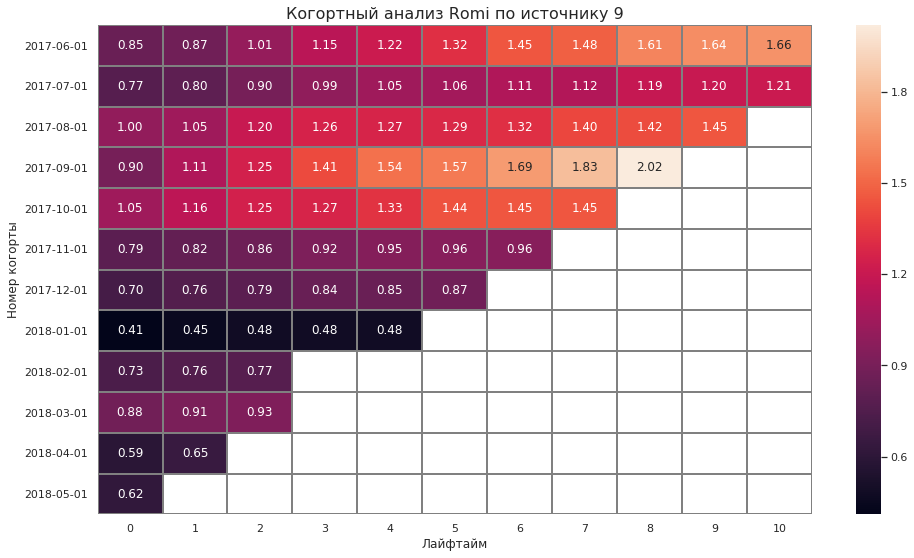

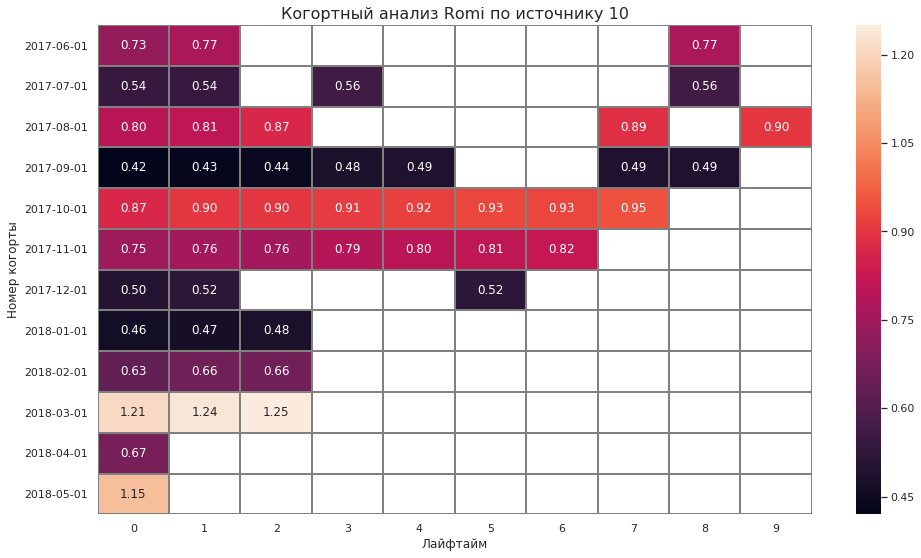

In [172]:
for i in sources: #запишем все в цикл
    romi(i)

In [173]:
report_new[report_new['source_id']==10]
# то ли я странный, то ли данные, но похоже что по 10 источнику и правда недостает данных

,source_id,first_order,order_month,revenue,n_buyers,ltv,cost_month,costs,cac,romi,age
466,10,2017-06-01,2017-06-01,229.35,95,2.414211,2017-06-01,314.22,3.307579,0.729903,0
467,10,2017-06-01,2017-07-01,11.06,95,0.116421,2017-06-01,314.22,3.307579,0.035198,1
468,10,2017-06-01,2018-02-01,0.85,95,0.008947,2017-06-01,314.22,3.307579,0.002705,8
469,10,2017-07-01,2017-07-01,176.53,51,3.461373,2017-07-01,329.82,6.467059,0.535231,0
470,10,2017-07-01,2017-08-01,1.59,51,0.031176,2017-07-01,329.82,6.467059,0.004821,1
471,10,2017-07-01,2017-10-01,7.63,51,0.149608,2017-07-01,329.82,6.467059,0.023134,3
472,10,2017-07-01,2018-03-01,0.37,51,0.007255,2017-07-01,329.82,6.467059,0.001122,8
473,10,2017-08-01,2017-08-01,184.90,37,4.997297,2017-08-01,232.57,6.285676,0.795029,0
474,10,2017-08-01,2017-09-01,4.15,37,0.112162,2017-08-01,232.57,6.285676,0.017844,1
475,10,2017-08-01,2017-10-01,12.22,37,0.330270,2017-08-01,232.57,6.285676,0.052543,2


##  Выводы и рекомендации

Самой окупаемой по возврату инвестиций оказался источник 1, когорта окупилась уже на 1 месяц. Это довольно хороший показатель, а к 12 месяцу уже в 5 раз приносили больше, чем затраченные на привлечения средства. 5 источник тоже эффективный.

В то же время, нужно оптимизировать расходы по 4 и 2 источникам, их окупаемость наступает позже чем у других источников, а 3 совсем не эффективный. В этом смысле, от него возможно стоит отказаться. 

По 10 мне сказать нечего. 


Все три вида показывают похожую тенденцию, есть довльно неплохие показатели по привлечениям юзеров, но довольно плохое удержание. Люди быстро покидают ресурс после целевого действия, вероятнее всего это какой-то один заказ, а потом они пропадают. Это демонстрируется падением уникальных пользователей, падением выручек по когортам. 

Однако, среди оставшихся показатели вовлеченности хорошие. Среднее количество заказов растет, растет и ценность среднего клиента. Тем не менее, в абсолютных значениях это возможно не такие большие цифры как могли бы быть. Я бы посоветовал сделать упор на удержание и мотивацию на повторный заказ. 

Данные выводы зависят от того в разрезе какой метрики судить. Если по кол-ву средних заказов, то когорта Сентября 2017 года является наиболее перспективной. 

Если же мы говорим о том, кто быстрее всех окупается - это определенно когорта Марта 2018 года, привлеченная по 1 источнику. 

Также стоит учитывать размеры когорт, более низкий доход с 1000 клиентов будет в абсолютном значении выше, чем более высокий со 100.

Говоря о эффективности, мне кажется ROMI наиболее верный показатель: во-первых, он учитывает валовый доход. Во-вторых, он учитывает расходы. Это позволяет говорить о том, насколько в целом доходны выбранные когорты. В нашем случае я бы сказал, что первая когорта(Июнь 2017 год) из 1 источника наиболее привлекательная. Мартовская быстрее окупилась, но надо посмотреть какая динамика будет дальше, а по первой есть больше данных, к тому же динамика роста очень хорошая. 
